In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_parquet("../data/northeast_realestate.parquet")

In [4]:
df.head()

,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,sold_date
0,225000.0,3.0,1.0,3.93,326 River Rd,Willington,Connecticut,6279.0,1572.0,None
1,579900.0,4.0,3.0,2.34,32 Heather Ln,Coventry,Connecticut,6238.0,3320.0,6/1/2021
2,65000.0,1.0,1.0,NaN,63 Schofield Rd Apt 34,Willington,Connecticut,6279.0,680.0,8/16/2019
3,215000.0,2.0,1.0,0.91,353 Rye St,East Windsor,Connecticut,6016.0,960.0,6/6/2012
4,144900.0,2.0,1.0,0.36,24 Worcester Rd,Vernon,Connecticut,6066.0,860.0,9/2/2016


In [6]:
df["citystate"]=df['city']+'_'+df['state']

top_towns = ['Staten Island_New York','Worcester_Massachusetts','Manhattan_New York','Portland_Maine']

df_top = df[df['citystate'].isin(top_towns)]
df_top = df_top[['price','bed','bath','house_size','citystate']].dropna()
df_top

,price,bed,bath,house_size,citystate
95335,319000.0,3.0,1.0,992.0,Portland_Maine
95387,314900.0,4.0,2.0,2272.0,Portland_Maine
95399,409000.0,3.0,2.0,1351.0,Portland_Maine
95404,424900.0,3.0,2.0,1656.0,Portland_Maine
95406,500000.0,3.0,2.0,1535.0,Portland_Maine
...,...,...,...,...,...
512398,290000.0,1.0,1.0,847.0,Staten Island_New York
512402,899000.0,2.0,2.0,1152.0,Manhattan_New York
512415,975000.0,1.0,1.0,638.0,Manhattan_New York
512416,3295000.0,5.0,6.0,3395.0,Manhattan_New York


In [8]:
df_top['citystate'].value_counts()

citystate
Staten Island_New York     7284
Worcester_Massachusetts    3386
Manhattan_New York         3287
Portland_Maine             1595
Name: count, dtype: int64

In [11]:
# Define model. Specify a number for random_state to ensure same results each run
model = LogisticRegression()
features = ['price','bed','bath','house_size']
X = df_top[features]
# Scale the data before fitting logistic regression
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

y = df_top['citystate']  #column 2

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y,
                                            train_size=0.8,
                                            random_state=66) 

# Fit model
model.fit(X_train, y_train)
scaled_X

,price,bed,bath,house_size
0,-0.407807,-0.224788,-0.984640,-0.643335
1,-0.409549,0.176210,-0.391614,0.143489
2,-0.369567,-0.224788,-0.391614,-0.422655
3,-0.362811,-0.224788,-0.391614,-0.235170
4,-0.330902,-0.224788,-0.391614,-0.309550
...,...,...,...,...
15547,-0.420129,-1.026783,-0.984640,-0.732467
15548,-0.161370,-0.625785,-0.391614,-0.544982
15549,-0.129078,-1.026783,-0.984640,-0.860941
15550,0.856673,0.577208,1.980490,0.833804


In [15]:
y_pred_train = model.predict(X_train)

y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_train, y_pred_train),
    metrics.recall_score(y_train, y_pred_train,average='macro'),#macro gives what is normally the BAS, weighted gives what is the AS 
    metrics.balanced_accuracy_score(y_train, y_pred_train),
    metrics.precision_score(y_test, y_pred,average='macro'))


print(metrics.accuracy_score(y_test, y_pred),
    metrics.recall_score(y_test, y_pred,average='macro'),#macro gives what is normally the BAS, weighted gives what is the AS 
    metrics.balanced_accuracy_score(y_test, y_pred),
    metrics.precision_score(y_test, y_pred,average='macro'))

0.78868258178603 0.6394145385998344 0.6394145385998344 0.6231027451669194
0.7843137254901961 0.636894314654013 0.636894314654013 0.6231027451669194


In [13]:
((12/89) + (13/90))/2

0.13963795255930087

In [14]:
(12+13)/(89+90)

0.13966480446927373

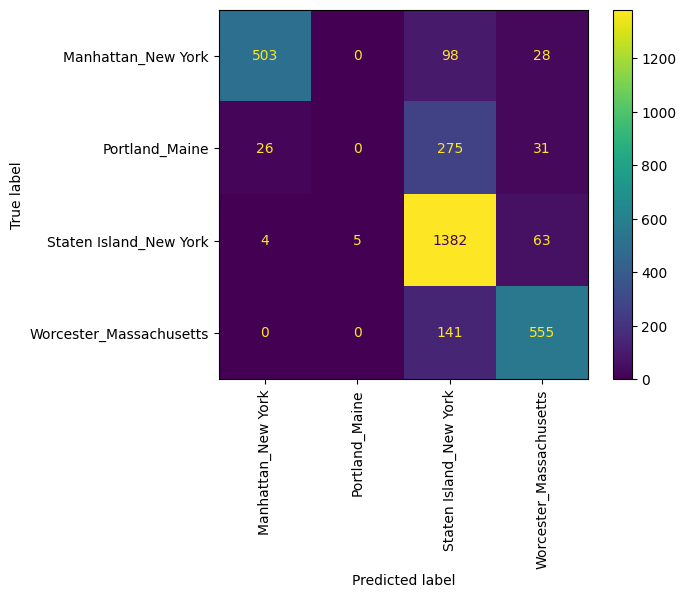

In [16]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=90)
plt.show()

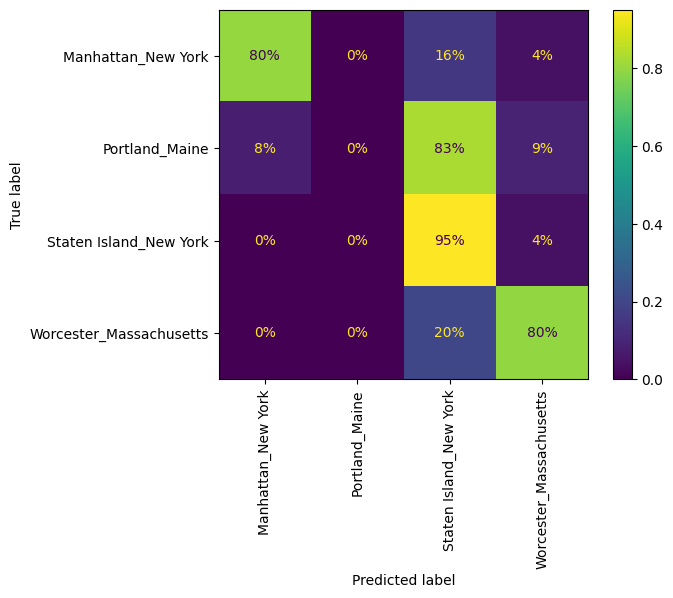

In [17]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', values_format=".0%")
plt.xticks(rotation=90)
plt.show()

In [18]:
# Define model. Specify a number for random_state to ensure same results each run
model = LogisticRegression()
y = np.where(df_top['citystate'] =='Worcester_Massachusetts', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y,
                                            train_size=0.8,
                                            random_state=66) 

# Fit model
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_train, y_pred_train),
    metrics.recall_score(y_train, y_pred_train,average='macro'),#macro gives what is normally the BAS, weighted gives what is the AS 
    metrics.balanced_accuracy_score(y_train, y_pred_train))


print(metrics.accuracy_score(y_test, y_pred),
    metrics.recall_score(y_test, y_pred,average='macro'),#macro gives what is normally the BAS, weighted gives what is the AS 
    metrics.balanced_accuracy_score(y_test, y_pred))

0.9180934008520215 0.8613377943507081 0.8613377943507081
0.9189971070395371 0.8675439066181195 0.8675439066181195


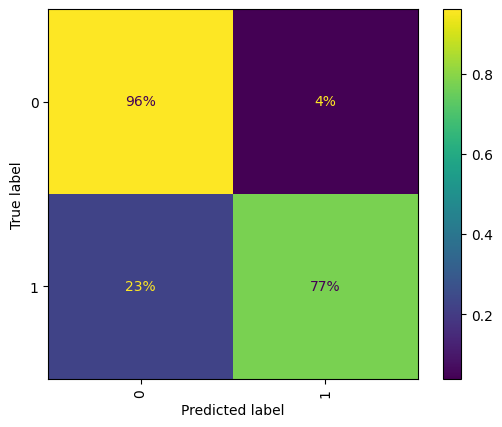

In [19]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', values_format=".0%")
plt.xticks(rotation=90)
plt.show()

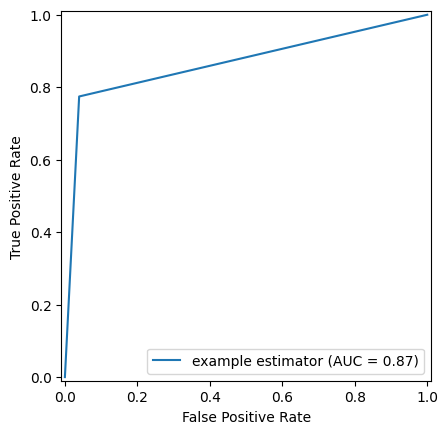

In [20]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()